In [22]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# Gardner and Liu (2007) Heat Flux

import xarray as xr
import numpy as np

# Altitude values from the table (z in km)
altitude = np.array([100.0, 97.5, 95.0, 92.5, 90.0, 87.5, 85.0])

# Independent variables and their errors from the table (col 2-6)
am = np.array([-0.1, 0.1, 0.0, -0.3, -1.2, -1.4, -1.0])  # Annual Mean
am_err = np.array([0.16, 0.13, 0.13, 0.16, 0.17, 0.16, 0.14])

m12_amp = np.array([1.5, 0.2, 0.0, 0.3, 0.6, 0.9, 0.7])  # 12-Month Amplitude
m12_amp_err = np.array([0.23, 0.18, 0.18, 0.23, 0.24, 0.23, 0.20])

m12_phase = np.array([1.0, 2.2, 6.3, 6.7, 6.7, 6.0, 4.5])  # 12-Month Phase
m12_phase_err = np.array([0.3, 1.7, 1.5, 0.8, 0.8, 0.5, 0.5])

m6_amp = np.array([0.7, 0.4, 0.4, 0.0, 0.9, 0.9, 0.9])  # 6-Month Amplitude
m6_amp_err = np.array([0.23, 0.18, 0.18, 0.23, 0.24, 0.23, 0.20])

m6_phase = np.array([3.8, 3.8, 3.2, 3.2, 3.2, 3.5, 3.0])  # 6-Month Phase
m6_phase_err = np.array([0.3, 0.4, 0.4, 0.3, 0.3, 0.2, 0.2])

# Model uncertainty from column 7
model_error = np.array([0.36, 0.29, 0.29, 0.36, 0.38, 0.36, 0.31])

# Creating the dataset
ds = xr.Dataset(
    {
        "am": (["z"], am, {"units": "K m s^-1", "long_name": "Annual Mean"}),
        "am_err": (["z"], am_err, {"units": "K m s^-1", "long_name": "Annual Mean Error"}),
        "12mamp": (["z"], m12_amp, {"units": "K m s^-1", "long_name": "12-Month Amplitude"}),
        "12mamp_err": (["z"], m12_amp_err, {"units": "K m s^-1", "long_name": "12-Month Amplitude Error"}),
        "12mpha": (["z"], m12_phase, {"units": "month", "long_name": "12-Month Phase"}),
        "12mpha_err": (["z"], m12_phase_err, {"units": "month", "long_name": "12-Month Phase Error"}),
        "6mamp": (["z"], m6_amp, {"units": "K m s^-1", "long_name": "6-Month Amplitude"}),
        "6mamp_err": (["z"], m6_amp_err, {"units": "K m s^-1", "long_name": "6-Month Amplitude Error"}),
        "6mpha": (["z"], m6_phase, {"units": "month", "long_name": "6-Month Phase"}),
        "6mpha_err": (["z"], m6_phase_err, {"units": "month", "long_name": "6-Month Phase Error"}),
        "model_error": (["z"], model_error, {"units": "K m s^-1", "long_name": "Model Uncertainty"}),
    },
    coords={"z": (["z"], altitude, {"units": "km", "long_name": "Altitude"})}
)

ds


<xarray.Dataset>
Dimensions:      (z: 7)
Coordinates:
  * z            (z) float64 100.0 97.5 95.0 92.5 90.0 87.5 85.0
Data variables:
    am           (z) float64 -0.1 0.1 0.0 -0.3 -1.2 -1.4 -1.0
    am_err       (z) float64 0.16 0.13 0.13 0.16 0.17 0.16 0.14
    12mamp       (z) float64 1.5 0.2 0.0 0.3 0.6 0.9 0.7
    12mamp_err   (z) float64 0.23 0.18 0.18 0.23 0.24 0.23 0.2
    12mpha       (z) float64 1.0 2.2 6.3 6.7 6.7 6.0 4.5
    12mpha_err   (z) float64 0.3 1.7 1.5 0.8 0.8 0.5 0.5
    6mamp        (z) float64 0.7 0.4 0.4 0.0 0.9 0.9 0.9
    6mamp_err    (z) float64 0.23 0.18 0.18 0.23 0.24 0.23 0.2
    6mpha        (z) float64 3.8 3.8 3.2 3.2 3.2 3.5 3.0
    6mpha_err    (z) float64 0.3 0.4 0.4 0.3 0.3 0.2 0.2
    model_error  (z) float64 0.36 0.29 0.29 0.36 0.38 0.36 0.31

In [41]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]
flux_list = []
for month in months:
    flux_temp = ds['am'] + ds['12mamp']*np.cos((2*np.pi/12) * (month - ds['12mpha'])) + ds['6mamp']*np.cos((4*np.pi/12) * (month-ds['6mpha']))
    flux_list.append(flux_temp)

In [42]:
flux = xr.concat(flux_list,dim='time')

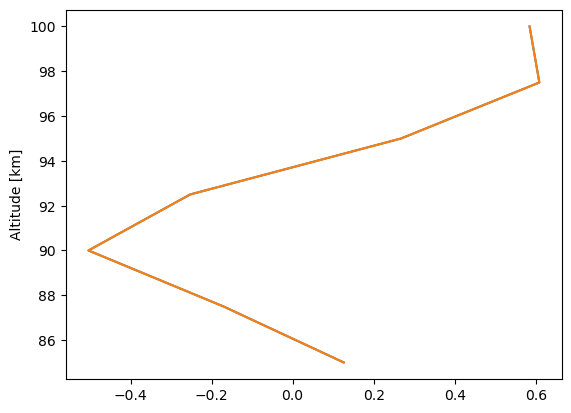

In [46]:
flux_list[3].plot(y='z')
flux.isel(time=3).plot(y='z')

<a list of 20 text.Text objects>

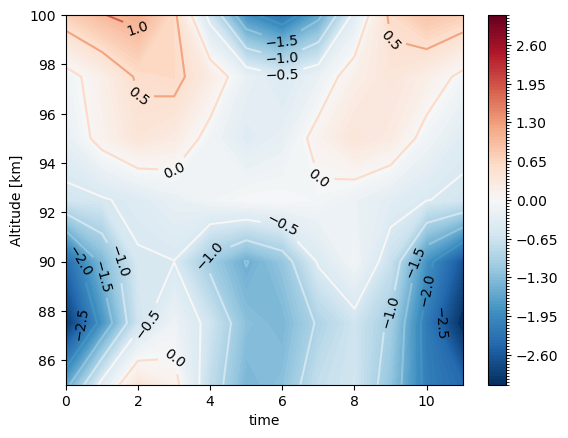

In [40]:
fig, ax = plt.subplots()
flux.plot.contourf(y='z',levels=150, ax = ax)
c = flux.plot.contour(y='z',levels=[-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2], ax = ax)
ax.clabel(c,colors='k')

# Create netcdf of T data

In [11]:
# import pandas as pd
# path = '/glade/derecho/scratch/mmkupilas/Analysis/Dan_Repo/waccm-rr-evaluation/data/SOR_LIDAR/'
# df = pd.read_table(path+"SOR_monthly_T.txt", skiprows=1,delim_whitespace=True,names = [1,2,3,4,5,6,7,8,9,10,11,12])

In [41]:
# # Inspect dataframe
# df

,1,2,3,4,5,6,7,8,9,10,11,12
0,218.8,224.9,229.0,225.9,217.4,210.3,210.3,216.7,223.1,224.1,220.0,216.7
1,213.1,220.2,227.3,226.3,216.3,205.1,201.8,208.7,218.7,222.9,219.1,213.2
2,209.6,217.0,225.2,224.9,214.4,201.5,196.7,203.0,213.7,219.1,215.8,209.8
3,207.5,212.5,219.1,220.2,213.1,202.4,196.2,198.8,206.6,212.3,211.9,208.2
4,206.2,209.1,213.6,214.5,208.9,199.8,193.5,194.2,200.4,206.5,208.4,206.9
5,204.3,206.2,210.4,210.8,203.5,191.7,183.3,184.4,193.6,203.5,207.7,206.2
6,202.5,203.2,205.7,204.8,197.3,186.5,179.7,182.3,192.3,202.5,206.7,205.0
7,200.6,199.4,200.3,198.9,192.4,183.1,177.8,181.1,191.4,201.9,206.3,204.4
8,199.2,196.8,197.0,195.8,189.9,181.5,176.9,180.7,191.5,202.3,206.7,204.1
9,198.6,195.9,196.1,194.8,188.8,180.4,176.1,180.7,192.2,203.3,207.4,204.1


In [35]:
# z = np.arange(80,105.5,0.5)
# ds = xr.Dataset()
# da = xr.DataArray(data=df.values,dims=['z','time'],coords={'z':z,'time':np.arange(1,13,1)})
# ds['T'] = da

In [43]:
# # Inspect
# ds

<xarray.Dataset>
Dimensions:  (z: 51, time: 12)
Coordinates:
  * z        (z) float64 80.0 80.5 81.0 81.5 82.0 ... 103.5 104.0 104.5 105.0
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    T        (z, time) float64 218.8 224.9 229.0 225.9 ... 194.7 190.0 194.1

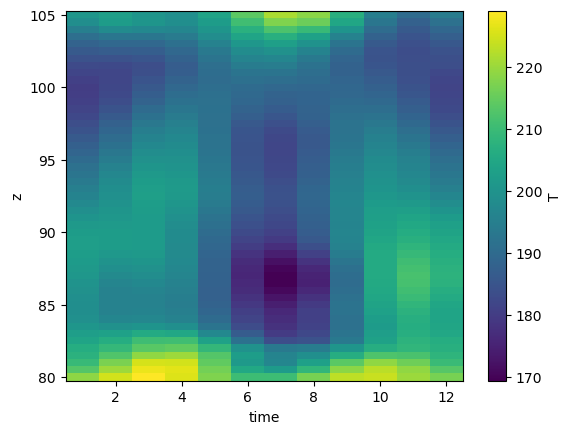

In [40]:
# ds['T'].plot(y='z')

In [42]:
# ds.to_netcdf('./processed_data/time_domain_means/SOR_monthly_T.nc')

# Derive T_wtrans for obs

In [45]:
path_flux = './processed_data/flux/monthly/'
path_T = './processed_data/time_domain_means/monthly/'
month = 12 
flux = xr.open_mfdataset(path_flux + "SOR_monthly_T_flux.nc").isel(time=month-1) # month 1 = index 0
T = xr.open_mfdataset(path_T + "SOR_monthly_T.nc").isel(time=month-1)

In [47]:
T = T.interp(z=flux.z) # Interpolate onto flux altitude

In [64]:
# Save wtrans dataset and convert units to cm s-1
wtrans = xr.Dataset()
wtrans['T_wtrans'] = 100*flux['T_flux']/T['T']

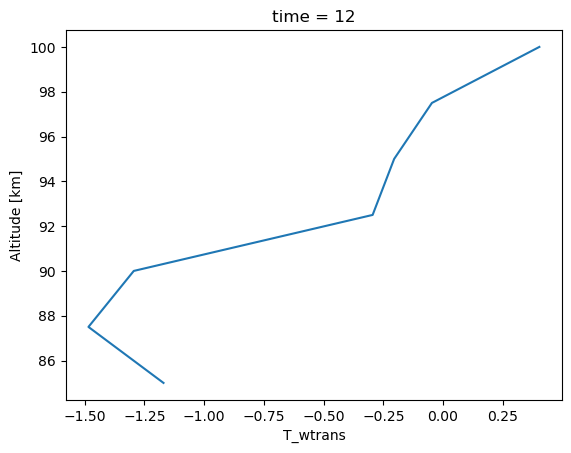

In [65]:
# Inspect
wtrans['T_wtrans'].plot(y='z')

In [66]:
# Save file
# path = './processed_data/wtrans/monthly/'
# filename='SOR_monthly_T_wtrans.nc'
# wtrans.to_netcdf(path+filename)